Entrenamiento y test
===========

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
classifier = KNeighborsClassifier(n_neighbors=8)

### Anotaciones
En este caso se utiliza el algoritmo K nearest Neighbors o K neighbors Classifier, que lo que hace es calcular la cantidad de vecinos mas cercanos, el cual corresponde a **aprendizaje supervisado** y consiste en clasificar el item seleccionado dependiendo de las clases de los puntos cercanos (vecinos). Un claro ejemplo se puede ver en el siguiente enlace. 

https://www.youtube.com/watch?v=ENSHwuJU5sU&list=PLJjOveEiVE4Cbbx1dVjydfmPPpjl0pg86&index=11

La cantidad de vecinos que se tienen en cuenta para clasificar el item seleccionado depende de la etiqueta **n_neighbors** que pasamos como parametro en el clasificador. El valor de esta etiqueta debe ser siempre mayor a uno para lograr predicciones consistentes. 

Lo que hacemos a continuacion es dividir los datos en 50 y 50 para entrenamiento y test.


In [2]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123)
print("Etiquetas para los datos de entrenamiento y test")
print(train_y)
print(test_y)

Etiquetas para los datos de entrenamiento y test
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


A veces solo partinionar los datos no es suficiente y lo que necesitamos es estratificar, es decir, dividir los datos de manera proporcional para seguir teniendo la misma cantidad de datos de cada clase en cada subconjunto


In [4]:
print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


Con solo agregar el parametro stratify en el metodo train_test_split ya tenemos los datos estratificados

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)



Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]
CCR [Accuracy]:
0.9866666666666667
0.9866666666666667


In [7]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("CCR [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))
print(classifier.score(test_X,test_y))

CCR [Accuracy]:
0.9866666666666667
0.9866666666666667


In [9]:
print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

for n in incorrect_idx:
    print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])

Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74]

Ejemplos incorrectamente clasificados:
[60]
valor de prd_y= 1 valor de test_y= 2


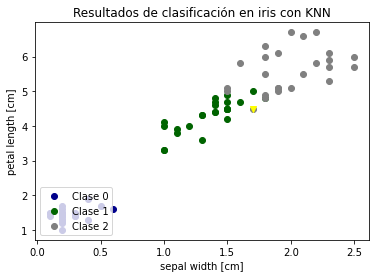

In [10]:
# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]
marcas=['v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''H','x','v']

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 3], test_X[idx, 2], color=color, label="Clase %s" % str(n))
i=0
for n in incorrect_idx:
    #print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])
    plt.scatter(test_X[n, 3], test_X[n, 2], color="yellow", marker=marcas[i])
    i=i+1

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
      <li>
      Imprime las etiquetas reales de 3 malas predicciones y modifica el código del scatterplot, que utilizamos anteriormente, para visualizar y distinguir estos tres ejemplos con distintos marcadores en el scatterplot 2D. ¿Podrías explicar porque el clasificador realizó malas predicciones?
      </li>
    </ul>
</div>

### Anotaciones
En el grafico anterior podemos ver como con un **n_neighbors** igual a 8, solo tenemos un dato erroneo, el cual aparece en amarillo. Ahora intentaremos cambiar este parametro para ver que sucede. Al cambiar el parametro lo que hacemos es elegir una cantidad distinta de vecinos cercanos. 


In [11]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("CCR [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))
print(classifier.score(test_X,test_y))

CCR [Accuracy]:
0.9466666666666667
0.9466666666666667


In [13]:
print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

for n in incorrect_idx:
    print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])

Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Ejemplos incorrectamente clasificados:
[44 49 54 60]
valor de prd_y= 2 valor de test_y= 1
valor de prd_y= 2 valor de test_y= 1
valor de prd_y= 2 valor de test_y= 1
valor de prd_y= 1 valor de test_y= 2


### Anotaciones
Podemos ver como al disminuir la cantidad de vecinos tenemos una mayor cantidad de errores. El clasificador realiza mal las predicciones porque existe una zona donde las features de los ejemplos se superponen. Entonces, la cantidad de vecinos cercanos, se vuelve mas dificil identificar a que clase corresponde el ejemplo. 

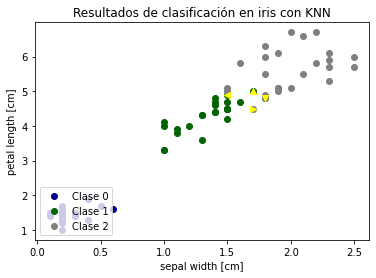

In [14]:
# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]
marcas=['v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''H','x','v']

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 3], test_X[idx, 2], color=color, label="Clase %s" % str(n))
i=0
for n in incorrect_idx:
    #print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])
    plt.scatter(test_X[n, 3], test_X[n, 2], color="yellow", marker=marcas[i])
    i=i+1

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("CCR [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))
print(classifier.score(test_X,test_y))

CCR [Accuracy]:
0.96
0.96


In [19]:
print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

for n in incorrect_idx:
    print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])

Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Ejemplos incorrectamente clasificados:
[44 49 60]
valor de prd_y= 2 valor de test_y= 1
valor de prd_y= 2 valor de test_y= 1
valor de prd_y= 1 valor de test_y= 2


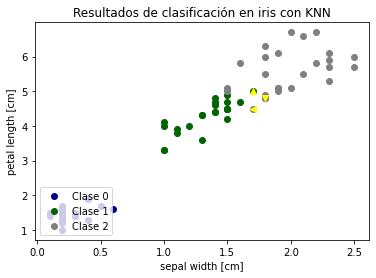

In [20]:
# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]
marcas=['v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''H','x','v']

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 3], test_X[idx, 2], color=color, label="Clase %s" % str(n))
i=0
for n in incorrect_idx:
    #print ("valor de prd_y=", pred_y[n], "valor de test_y=",test_y[n])
    plt.scatter(test_X[n, 3], test_X[n, 2], color="yellow", marker=marcas[i])
    i=i+1

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()